In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
pfad = "/Users/kamalizzuddin/Desktop/masterarbeit/messungen/messungen 21. Jan/Messung_MEMS_Sensor/"
m10_psd = "Messung_10_sin_50Hz/ResponseAutoPowers/PSD Point1.txt"
m10_tp = "Messung_10_sin_50Hz/Throughput Data/Throughput_Data.txt" 
m11_psd = "Messung_10_sin_50Hz/ResponseAutoPowers/PSD Point1.txt"
m11_tp = "Messung_10_sin_50Hz/Throughput Data/TD.txt"
m12_psd = "Messung_10_sin_50Hz/ResponseAutoPowers/PSD.txt"
m12_tp = "Messung_10_sin_50Hz/Throughput Data/TD.txt"
m13_psd = "Messung_10_sin_50Hz/ResponseAutoPowers/PSD.txt"
m13_tp = "Messung_10_sin_50Hz/Throughput Data/TD.txt"

In [3]:
td = pd.read_csv(pfad + m10_psd, header=None, names=['Hz', 'g^2/Hz', 'c3', 'c4', 'c5'],encoding='ISO-8859-1', sep='\t', decimal='.', skiprows=43)

td_tp = pd.read_csv(pfad + m10_tp, header=None, names=['time', 'accel', 'c3', 'c4', 'c5'],encoding='ISO-8859-1', sep='\t', decimal='.', skiprows=34)

In [27]:

td_tp.head(100)


,time,accel,c3,c4,c5
0,0.032445,4.318762,NaN,NaN,NaN
1,0.033695,5.452631,NaN,NaN,NaN
2,0.034945,5.755231,NaN,NaN,NaN
3,0.036195,5.181483,NaN,NaN,NaN
4,0.037445,3.824651,NaN,NaN,NaN
...,...,...,...,...,...
95,0.151195,2.538889,NaN,NaN,NaN
96,0.152445,4.317304,NaN,NaN,NaN
97,0.153695,5.450405,NaN,NaN,NaN
98,0.154945,5.753804,NaN,NaN,NaN


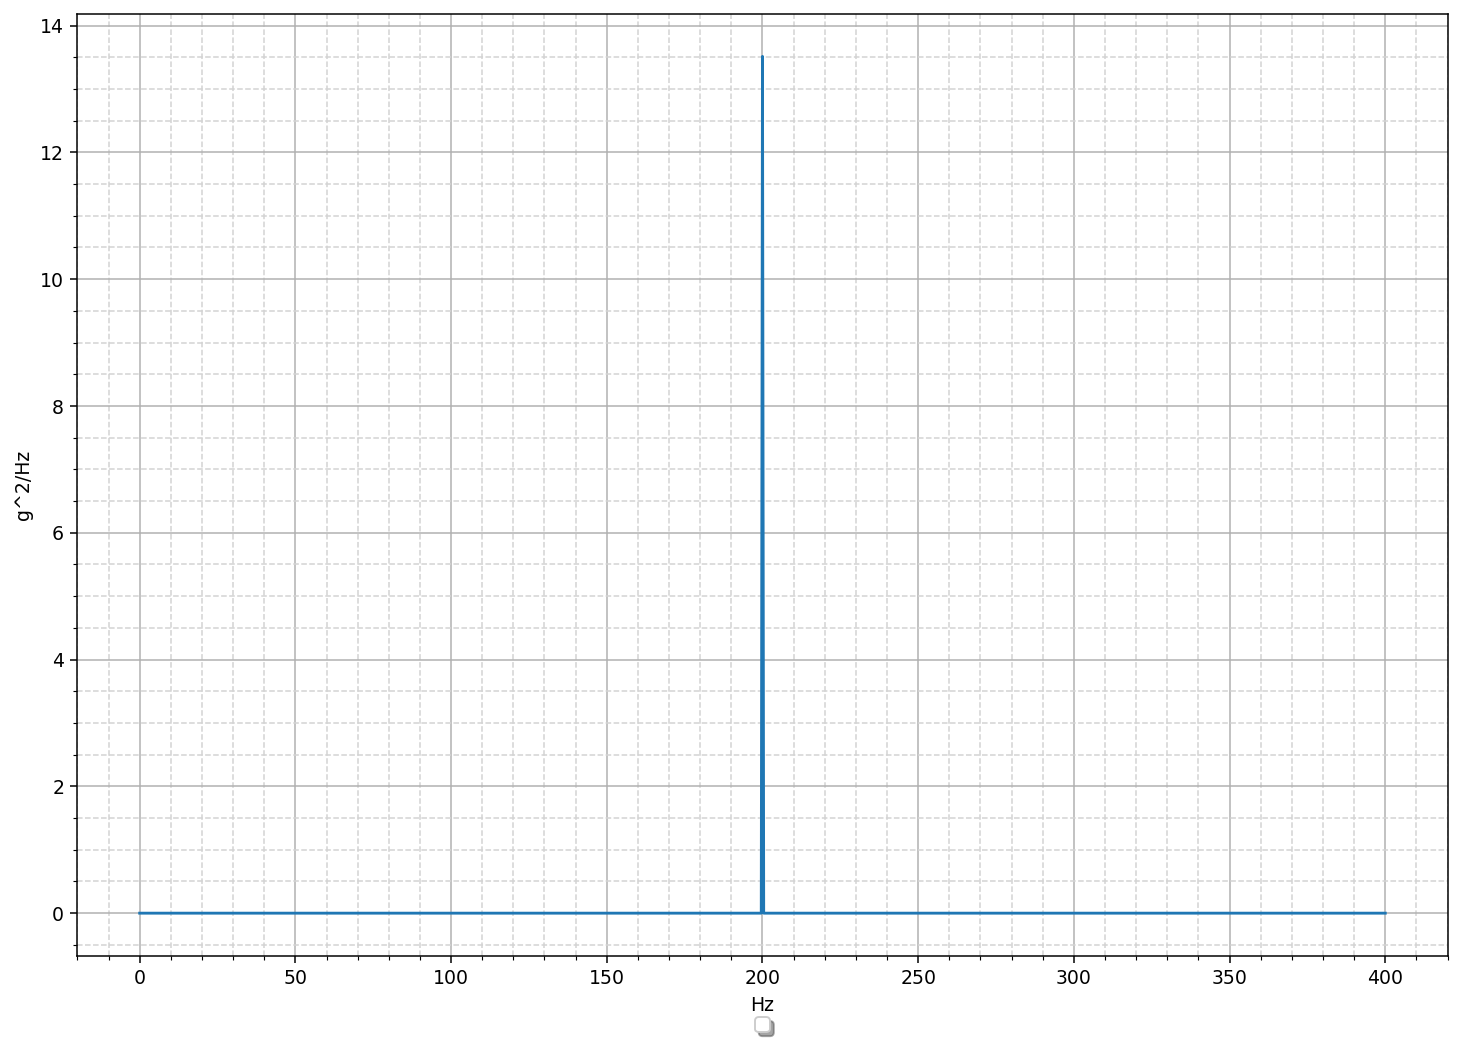

In [5]:
fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot(111)


ax1.plot(td['Hz'], td['g^2/Hz'])
# ax1.scatter(cur, vol)
line, label = ax1.get_legend_handles_labels()
ax1.legend(line, label, loc='upper center', bbox_to_anchor=(0.5,-0.055),fancybox=True, shadow=True, ncol=6)
ax1.minorticks_on()
plt.grid(True)
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
# ax1.set_xlim(xrange)
ax1.set_xlabel('Hz')
# ax1.set_ylim(yrange)
ax1.set_ylabel('g^2/Hz')

# plt.close(fig)
plt.show()


In [4]:
pfad_mpu = '/Users/kamalizzuddin/Desktop/masterarbeit/messungen/messungen 21. Jan/'
mpu10 = 'OUTPUT8_50Hz_8g.csv' #max - time[7870:7890]-112.3, min - time[7870:9250]-112.3
mpu11 = 'OUTPUT9_100Hz_8g.csv'
mpu12 = 'OUTPUT10_200Hz_8g.csv'
mpu13 = 'OUTPUT11_200Hz_8g_A.csv'

In [5]:
sd = pd.read_csv(pfad_mpu + mpu10, sep=';', decimal='.')
# /Users/kamalizzuddin/Desktop/masterarbeit/messungen




In [31]:
sd

,Iter.,t[s],lt[ms],vib_sensor,AccX [g],AccY [g],AccZ [g],GyroX [°/s],GyroY [°/s],GyroZ [°/s],PitchX [°],RollY [°],T [°C],T [°F],Unnamed: 14
0,1,2.80,1,0,0.02,-0.01,0.24,0.65,-1.61,0.65,NAN,NAN,19.64,67.34,NaN
1,2,2.81,2,0,0.02,-0.01,0.24,0.56,-1.39,0.56,NAN,NAN,19.64,67.34,NaN
2,3,2.82,2,0,0.02,-0.01,0.24,0.45,-1.39,0.45,NAN,NAN,19.59,67.26,NaN
3,4,2.83,2,0,0.02,-0.01,0.24,0.61,-1.41,0.61,NAN,NAN,19.64,67.34,NaN
4,5,2.85,2,0,0.02,-0.01,0.24,0.35,-1.37,0.34,NAN,NAN,19.59,67.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,11386,161.64,2,0,0.02,-0.01,0.24,0.36,-1.44,0.36,NAN,NAN,19.64,67.34,NaN
11386,11387,161.66,1,0,0.02,-0.01,0.24,0.45,-1.60,0.45,NAN,NAN,19.68,67.43,NaN
11387,11388,161.67,1,0,0.01,-0.01,0.24,0.68,-1.54,0.67,NAN,NAN,19.78,67.60,NaN
11388,11389,161.68,2,0,0.02,-0.01,0.24,0.48,-1.63,0.47,NAN,NAN,19.73,67.51,NaN


In [6]:
import scipy 
from scipy.fft import fft, ifft
from scipy import integrate
from scipy.signal import welch, savgol_filter

In [17]:
sd

,Iter.,t[s],lt[ms],vib_sensor,AccX [g],AccY [g],AccZ [g],GyroX [°/s],GyroY [°/s],GyroZ [°/s],PitchX [°],RollY [°],T [°C],T [°F],Unnamed: 14
0,1,2.80,1,0,0.02,-0.01,0.24,0.65,-1.61,0.65,NAN,NAN,19.64,67.34,NaN
1,2,2.81,2,0,0.02,-0.01,0.24,0.56,-1.39,0.56,NAN,NAN,19.64,67.34,NaN
2,3,2.82,2,0,0.02,-0.01,0.24,0.45,-1.39,0.45,NAN,NAN,19.59,67.26,NaN
3,4,2.83,2,0,0.02,-0.01,0.24,0.61,-1.41,0.61,NAN,NAN,19.64,67.34,NaN
4,5,2.85,2,0,0.02,-0.01,0.24,0.35,-1.37,0.34,NAN,NAN,19.59,67.26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11385,11386,161.64,2,0,0.02,-0.01,0.24,0.36,-1.44,0.36,NAN,NAN,19.64,67.34,NaN
11386,11387,161.66,1,0,0.02,-0.01,0.24,0.45,-1.60,0.45,NAN,NAN,19.68,67.43,NaN
11387,11388,161.67,1,0,0.01,-0.01,0.24,0.68,-1.54,0.67,NAN,NAN,19.78,67.60,NaN
11388,11389,161.68,2,0,0.02,-0.01,0.24,0.48,-1.63,0.47,NAN,NAN,19.73,67.51,NaN


In [18]:
def low_pass_filter(data, alpha=0.1):
    filtered = np.zeros_like(data)
    filtered[0] = data[0]
    for i in range(1, len(data)):
        filtered[i] = filtered[i-1] + alpha * (data[i] - filtered[i-1])
    return filtered

In [19]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

In [7]:
# AccY = (sd['AccY [g]'] + 0.01)*16384/4096
# AccX = (sd['AccX [g]'] - 0.02)*16384/4096
AccZ = (sd['AccZ [g]'] - 0.24)*16384/4096
# AccY -= np.mean(AccY)
# AccX -= np.mean(AccX)
# AccZ -= np.mean(AccZ)
time = sd['t[s]']



In [12]:
td_tp['time'][:240]

0      0.032445
1      0.033695
2      0.034945
3      0.036195
4      0.037445
         ...   
235    0.326195
236    0.327445
237    0.328695
238    0.329945
239    0.331195
Name: time, Length: 240, dtype: float64

In [55]:
time[7750:]-110


7750      0.65
7751      0.66
7752      0.68
7753      0.69
7754      0.70
         ...  
11385    51.64
11386    51.66
11387    51.67
11388    51.68
11389    51.70
Name: t[s], Length: 3640, dtype: float64

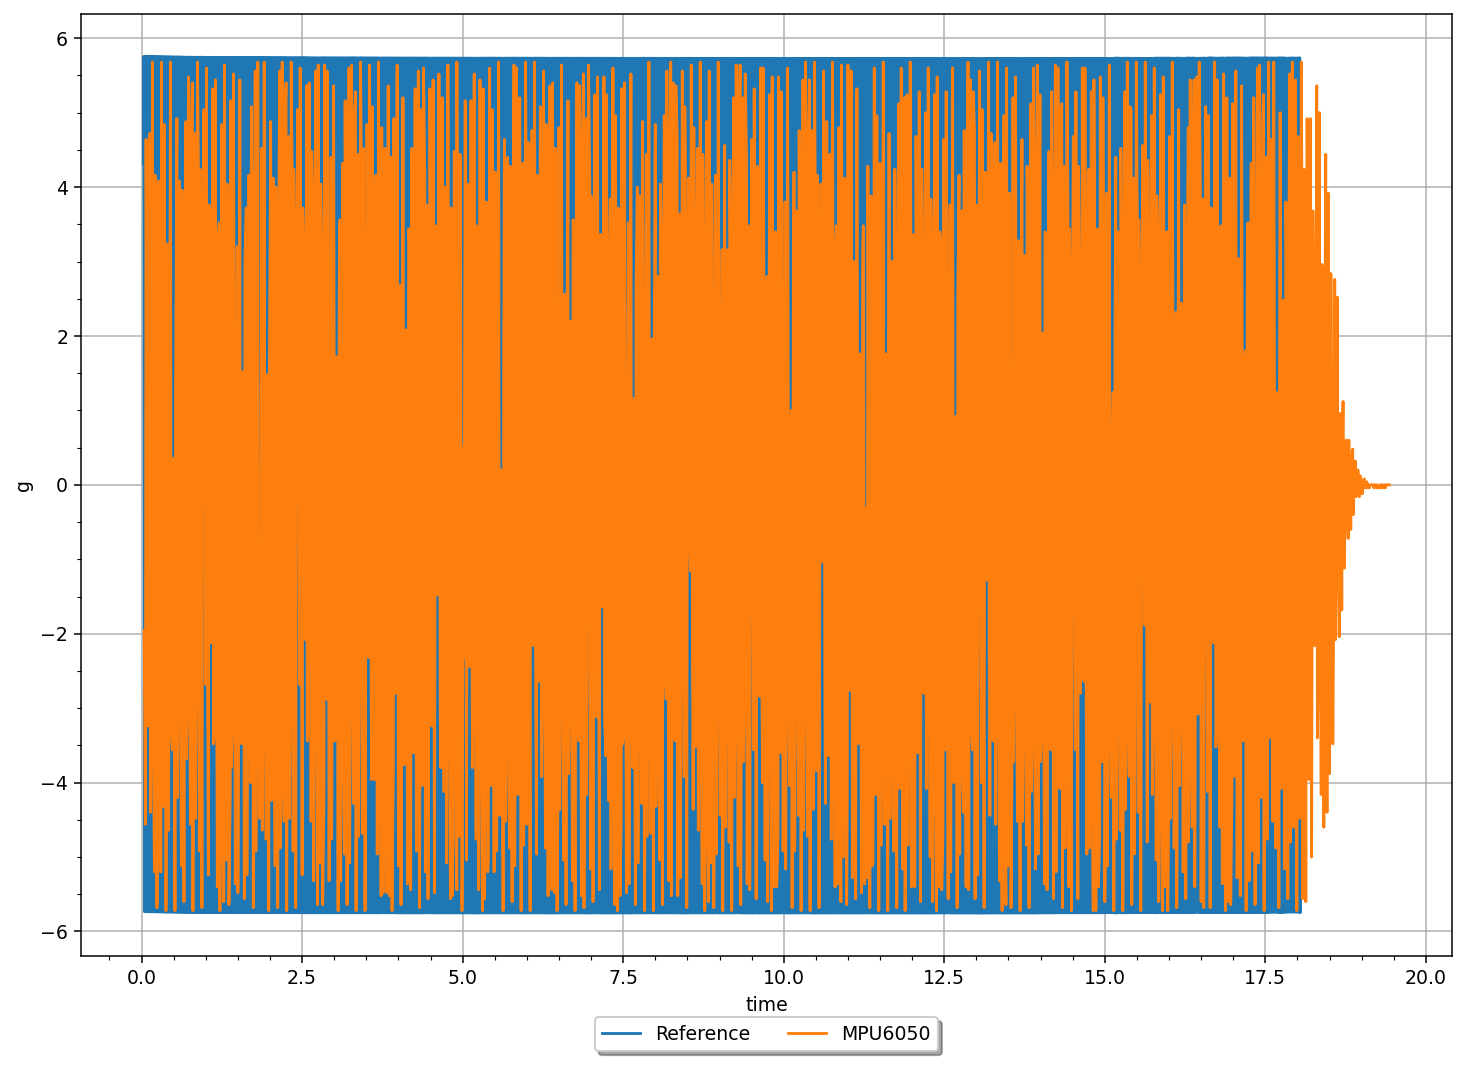

In [14]:
fig_test = plt.figure(figsize=(13, 9), dpi=136)
ax1_test = fig_test.add_subplot(111)


ax1_test.plot(td_tp['time'], td_tp['accel'],label='Reference')
ax1_test.plot(time[7870:9250]-112.3, AccZ[7870:9250], label='MPU6050')
line_test, label_test = ax1_test.get_legend_handles_labels()
ax1_test.legend(line_test, label_test, loc='upper center', bbox_to_anchor=(0.5,-0.055),fancybox=True, shadow=True, ncol=6)
ax1_test.minorticks_on()
ax1_test.set_xlabel('time')
# ax1.set_ylim(yrange)
ax1_test.set_ylabel('g')
plt.grid(True)
plt.show()

In [106]:
sampling_rate = 500  # Hz (MPU6050's sampling rate)
n = len(AccZ[7870:9250])  # Total number of samples

# Compute the frequency axis
frequencies = np.fft.rfftfreq(n, d=1/sampling_rate)

# Compute FFT and convert to PSD
fft_values = np.fft.fft(AccZ[7870:9250])
psd_values = np.abs(fft_values) ** 2 / (sampling_rate*n)  # Normalize by N

In [100]:
another_freqs, psds = welch(AccZ[7870:9250], fs=500, nperseg=512)


In [ ]:


VelY = integrate.cumulative_trapezoid(AccY, time,  initial=0)
AmpY = integrate.cumulative_trapezoid(VelY, time,  initial=0)
window = np.hanning(len(AccZ))


len_accz = len(AccZ)
fft_res = np.fft.fft(AccZ*window)
freqs = np.fft.fftfreq(len_accz, 1/500)
mags = np.abs(fft_res)

# smoothed_signal = low_pass_filter(AccZ, alpha=0.05)
smoothed_signal = savgol_filter(AccZ, window_length=5, polyorder=3)


another_freqs, psds = welch(AccZ, fs=500, scaling='density')



ValueError: x and y must have same first dimension, but have shapes (691,) and (1380,)

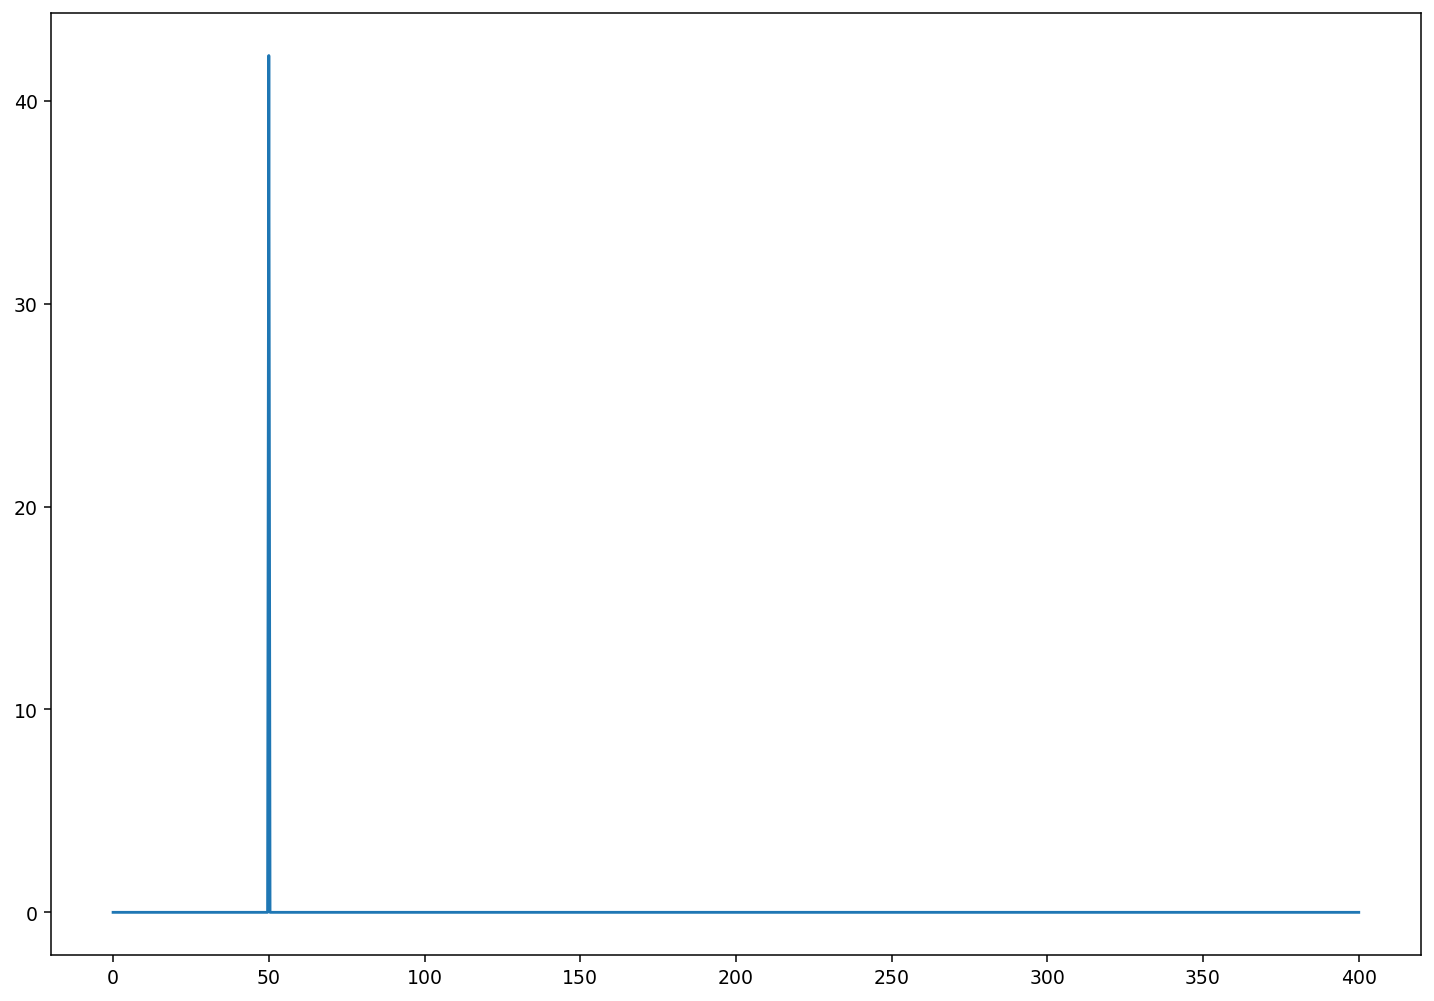

In [107]:
fig = plt.figure(figsize=(13, 9), dpi=136)
ax1 = fig.add_subplot()
# ax2 = ax1.twinx()

# ax2 = fig.add_subplot(212)

ax1.plot(td['Hz'], td['g^2/Hz'], label='Reference')
# ax2.plot(td_tp['time'], td_tp['accel'], label='Lab')

ax1.plot(frequencies, psd_values, label='MPU6050')
# ax1.plot(another_freqs, psds, label='MPU6050')

# ax2.plot(time, smoothed_signal, label='SensorZ')


# ax2.plot(time, AmpY, 'r-',label='2nd')

# ax1.scatter(cur, vol)
line, label = ax1.get_legend_handles_labels()
ax1.legend(line, label, loc='upper center', bbox_to_anchor=(0.5,-0.055),fancybox=True, shadow=True, ncol=6)
ax1.minorticks_on()
plt.grid(True)
ax1.grid(True, which='minor', color='lightgrey', linestyle='--')
# ax1.set_xlim(xrange)
ax1.set_xlabel('time')
# ax1.set_ylim(yrange)
ax1.set_ylabel('g^2/hz')
# ax2.set_ylabel('[ms^-1]')
# ax2.set_ylabel('m')


# plt.close(fig)
plt.show()

In [9]:
AccZ

0       0.003529
1      -0.036471
2      -0.036471
3       0.003529
4      -0.036471
          ...   
2681    0.003529
2682    0.003529
2683   -0.036471
2684    0.003529
2685    0.003529
Name: AccZ [g], Length: 2686, dtype: float64

In [11]:
import plotly.express as px

d = {'time': time, 'accel': AccZ}
df = pd.DataFrame(data=d)
fig = px.line(df, x="time", y="accel", title="t vs accel")
fig.show()